### Importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Importing the dataset

In [5]:
dataset_link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT1lB5BGilB10K5MBPSUwhbRHmp3lqbgAGm6x8P1qrP6lrbOhjuJSWP-UUYGhJwyjHA4COgUAA_qerg/pub?gid=0&single=true&output=csv'
df = pd.read_csv(dataset_link)

In [6]:
df.head()

,lactate_dehydrogenase,hcr_protein,lymphocyte_percent,outcome
0,0,0.0,28.0,0
1,183,5.1,0.0,0
2,0,0.0,28.6,0
3,194,2.7,0.0,0
4,0,0.0,28.3,0


In [8]:
df.tail()

,lactate_dehydrogenase,hcr_protein,lymphocyte_percent,outcome
752,562,78.1,0.0,0
753,0,0.0,9.7,0
754,438,0.0,0.0,0
755,430,31.2,0.0,0
756,0,0.0,10.0,0


### Correlation Matrix

In [15]:
corrMatrix = df.corr()
df.corr()

,lactate_dehydrogenase,hcr_protein,lymphocyte_percent,outcome
lactate_dehydrogenase,1.000000,0.387984,-0.440546,0.347726
hcr_protein,0.387984,1.000000,-0.241189,0.299289
lymphocyte_percent,-0.440546,-0.241189,1.000000,-0.387234
outcome,0.347726,0.299289,-0.387234,1.000000


### Visual Representation of Correlation Matrix

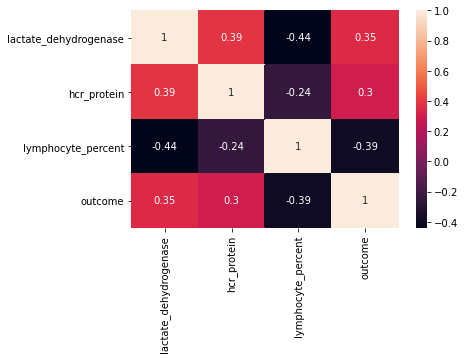

In [16]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Seperating the features and independent variables

In [19]:
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values

#### Spliting the dataset into test and train

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

### Fitting the model

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( 
            n_estimators=26,
            criterion='entropy',
            max_depth=9,
            random_state=42)
classifier.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=26,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Prediction Vector

In [30]:
y_pred = classifier.predict(X=X_test)

### Plotting the confusion matrix

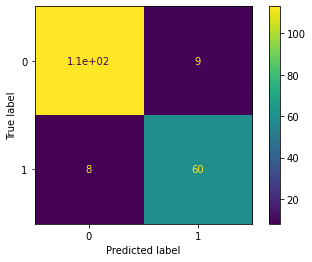

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

#### Accuracy Score

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9105263157894737